# Predicting flower species

# Setup

## Business problem

[Slides explaining the business problem](https://docs.google.com/presentation/d/1St9pn2o1xR4_S9GS4uoGl9S4r0JCo8nPppBFBWdf3DA/edit?usp=sharing)

In this notebook, we are going to build a predictive model learning to explore the capacity of machine learning to address the taxonomic impediment.

## Common imports

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

## Constants

In [11]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

## Load the data

We will use the Iris flower dataset already available in Scikit-learn.

In [12]:
from sklearn.datasets import load_iris

iris = load_iris()

The iris dataset above contains a dictionary with the following values:
- DESCR: a description of the data including information about the attributes and target variable
- data: an array containing the attributes and their values
     - Sepal length
     - Sepal width
     - Petal length
     - Petal width
- target: an array containing the target variable, i.e., the Iris flower species
     - 0: Setosa
     - 1: Versicolor
     - 2: Virgnica

To facilitate the exploration of the dataset, we will build a Pandas DataFrame with all the attributes and target variable. We can create a function:

In [13]:
def create_iris_df(iris_dataset):
    # Create a list with all data
    iris_all_data= []

    for i, x in enumerate(iris_dataset.data):
        iris_all_data.append(x.tolist() + [iris_dataset.target[i]])

    # Create a DataFrame from the list
    iris_df= pd.DataFrame(
        iris_all_data,
        columns=iris_dataset.feature_names + ["species_num"]
    )

    return iris_df

In [14]:
iris_df= create_iris_df(iris)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Modeling

We want to build a model that predicts the species of the Iris flower. Since the values of the species variable are discrete, we will build a classification model.

## Data understanding

Let’s create a copy so that we can explore the data more easily:

In [15]:
iris_df_viz = iris_df.copy()

In [16]:
iris_df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_num        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Note the data type of the target variable (species) is a number (int64).

To facilitate the interpretability of the model, we replace the numeric values of the target variable with the species names in the original iris dataset.

In [17]:
iris_df_viz['species']= iris_df_viz['species_num'].apply(lambda x: iris.target_names[x])
iris_df_viz= iris_df_viz.drop('species_num', axis=1)

iris_df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Take a quick look at the data structure:

In [18]:
iris_df_viz.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
iris_df_viz["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### Visualize variables distribution with histograms

**Attributes distribution**

Note that all four attributes are numeric.

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'species_num'}>, <AxesSubplot:>]],
      dtype=object)

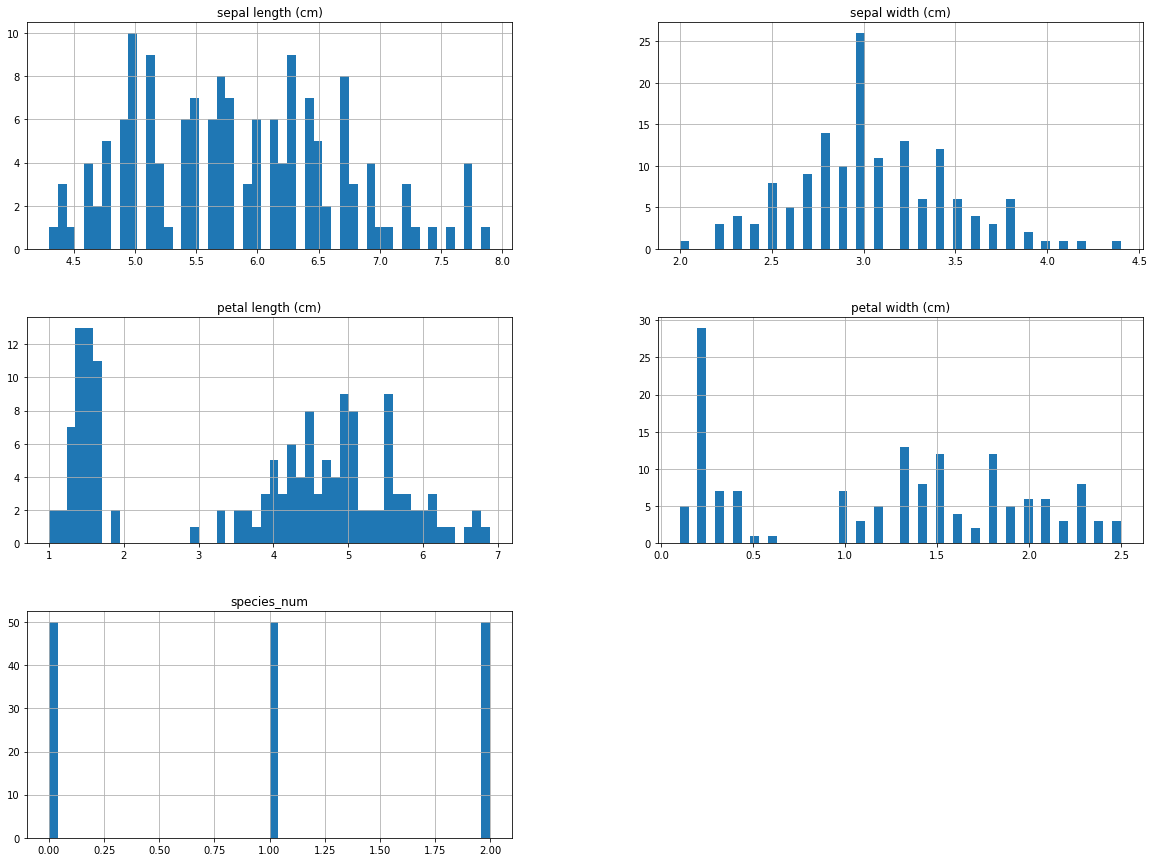

In [20]:
iris_df.hist(bins=50, figsize=(20,15))

**Target variable distribution**

<AxesSubplot:>

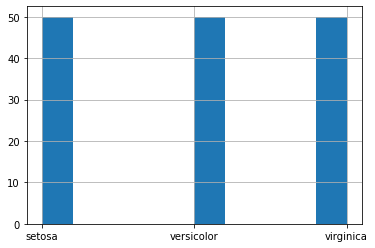

In [21]:
iris_df_viz['species'].hist()

### Looking for the relationship between the target variable and the attributes

In [22]:
def plot_class_attribute_dist(df, class_var, attribute):
    df.groupby(class_var)[attribute].plot.hist(
        alpha=0.4, figsize=(6,5))
    plt.suptitle(attribute)
    plt.legend()

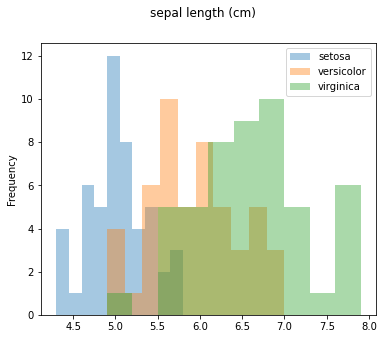

In [23]:
plot_class_attribute_dist(iris_df_viz, 'species', 'sepal length (cm)')

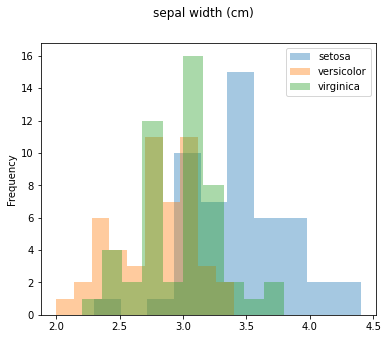

In [24]:
plot_class_attribute_dist(iris_df_viz, 'species', 'sepal width (cm)')

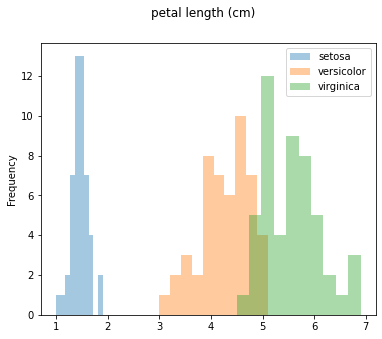

In [25]:
plot_class_attribute_dist(iris_df_viz, 'species', 'petal length (cm)')

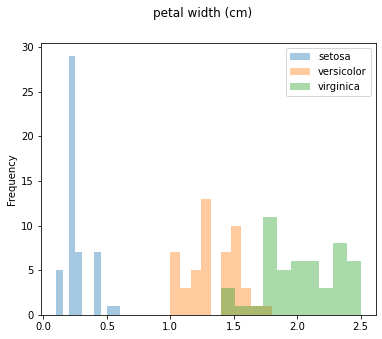

In [26]:
plot_class_attribute_dist(iris_df_viz, 'species', 'petal width (cm)')

### Look for correlations between attributes with scatter plots

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

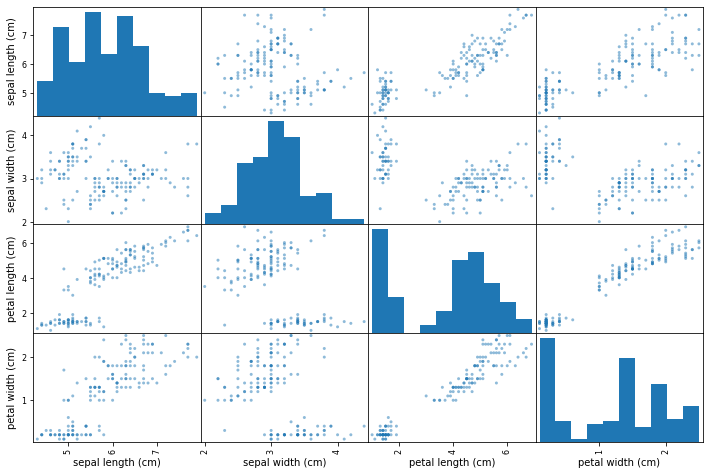

In [27]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris_df[iris.feature_names], figsize=(12, 8))

## Build the model

The following code trains a DecisionTreeClassifier on the iris dataset.

We will use the original dataset.

In [28]:
from sklearn.tree import DecisionTreeClassifier

X = iris_df[iris.feature_names[2:]]
y = iris_df["species_num"]

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

We can visualize the trained decision tree by first using the export_graphviz() method to output a graph definition file called iris_tree.dot:

Download graphviz from: http://www.graphviz.org/download/

In [29]:
from graphviz import Source
from sklearn.tree import export_graphviz

def visualize_tree(tree_clf, feature_names, class_names, viz_name):
    export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, viz_name),
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )    

In [32]:
iris.feature_names[:2]

['sepal length (cm)', 'sepal width (cm)']

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Alternatively, if you don't have graphviz installed, you can just display the tree visualization with the following Markdown code:

\!\[iris_tree\](.\\images\\iris_tree.svg)

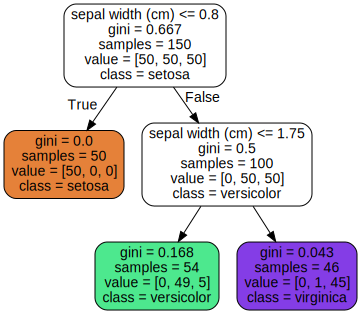

In [33]:
viz_name= "iris_tree.dot"
visualize_tree(tree_clf, iris.feature_names[:2], iris.target_names, viz_name)
Source.from_file(os.path.join(IMAGES_PATH, viz_name))

### Making predictions

Text(4.05, 0.5, '(Depth=2)')

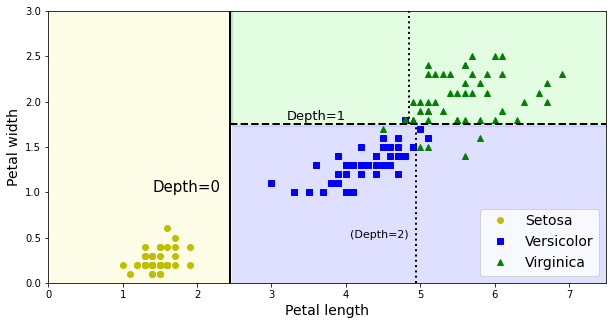

In [25]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X_df, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    X= X_df.to_numpy()
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(10, 5))

plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

### Estimating class probabilities

In [26]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [27]:
tree_clf.predict([[5, 1.5]])

array([1])

### Evaluate performance

In [28]:
def evaluate_performance(tree_clf, X, y):
    y_pred = tree_clf.predict(X)
    n_correct = sum(y_pred == y)    
    print(n_correct / len(y_pred))

In [29]:
evaluate_performance(tree_clf, X, y)

0.96


Now, let's try to train a better classifier by constructing a classification tree with all attributes and without restrictions on its depth

In [30]:
X_2 = iris_df[iris.feature_names]

tree_clf_2 = DecisionTreeClassifier()
tree_clf_2.fit(X_2, y)

DecisionTreeClassifier()

In [31]:
evaluate_performance(tree_clf_2, X_2, y)

1.0


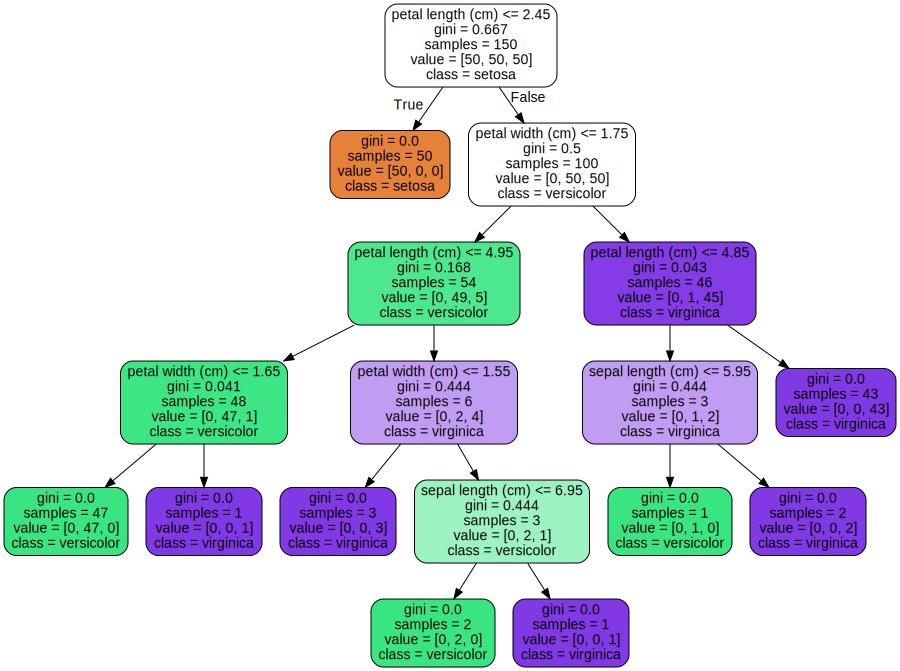

In [32]:
viz_name= "iris_tree_2.dot"
visualize_tree(tree_clf_2, iris.feature_names, iris.target_names, viz_name)
Source.from_file(os.path.join(IMAGES_PATH, viz_name))

### Feature importance

In [42]:
feature_importances = tree_clf_2.feature_importances_
feature_importances

array([0.02666667, 0.        , 0.55072262, 0.42261071])

Let’s display these importance scores next to their corresponding attribute names:

In [43]:
sorted(zip(feature_importances, iris.feature_names), reverse=True)

[(0.5507226247987118, 'petal length (cm)'),
 (0.42261070853462157, 'petal width (cm)'),
 (0.026666666666666665, 'sepal length (cm)'),
 (0.0, 'sepal width (cm)')]

# Solution

The decision tree seems to good to be true!

*References*

- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. Chapters 2, 3, and 6.